In [1]:
from matplotlib import pyplot as plt
import numpy as np

## Example with fixing n and m

Below is an example where I fix $n$(the number of vertices), and sample the chromatic number of 5000 graphs found in $G(n,m)$. To start out with I fix $m$(the number of edges) aswell.

In [2]:
#For simplicity lets set n, the number of vertices
n = 7
m = 14

#also pre determine how much we want to sample
N = 100

#rename the function
def Gnm(n,m): return graphs.RandomGNM(n,m)

#example for m edges
Chi = [ Gnm(n,m).chromatic_number() for i in range(N)]

## Visualizing the Distribution

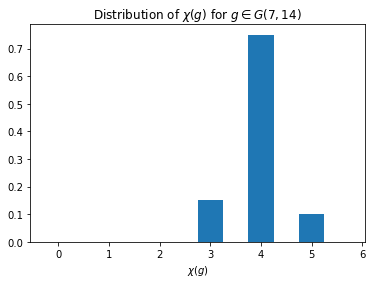

In [3]:
bins = np.arange(0, max(Chi) + 1.25) - 0.25

fig, ax = plt.subplots()
ax.hist(Chi, bins,width=0.5,density=True)
ax.set_xticks(bins + 0.25)
ax.set_title(fr'Distribution of $\chi(g)$ for $g\in G({n},{m})$ ')
ax.set_xlabel(fr'$\chi(g)$')

plt.show()

Looking back on this since $G(n,m)$ is surely finite, sampling randomly seems ridicoulouse. It may be more efficient and certainly more accurate to just take the entire population, that is all graphs in $G(n,m)$. Below is the same figure utilizing the entire $G(n,m)$.

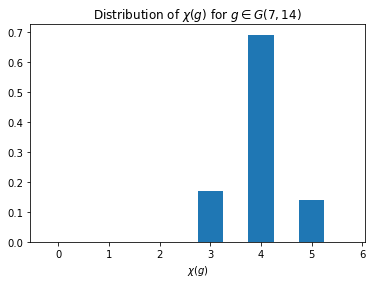

In [4]:
#make the generator and get the chi's from there
gen = graphs(n, size=m)
Chi = [g.chromatic_number() for g in gen]

bins = np.arange(0, max(Chi) + 1.25) - 0.25

fig, ax = plt.subplots()
ax.hist(Chi, bins,width=0.5,density=True)
ax.set_xticks(bins + 0.25)
ax.set_title(fr'Distribution of $\chi(g)$ for $g\in G({n},{m})$ ')
ax.set_xlabel(fr'$\chi(g)$')

plt.show()

Notice the Distribution are slightly diffrent this is because $|G(7,14)|=65$ but there were 100 samples, thus some chromatic numbers were overepresented by simple virtue of randomness. It seems random sampling isnt realy viable.

## Variable Size of Graph

Now I visualize the distributions for $G(n,m)$ with $n=4$ and every $m\in [1,\frac{n(n-1)}{2}]$

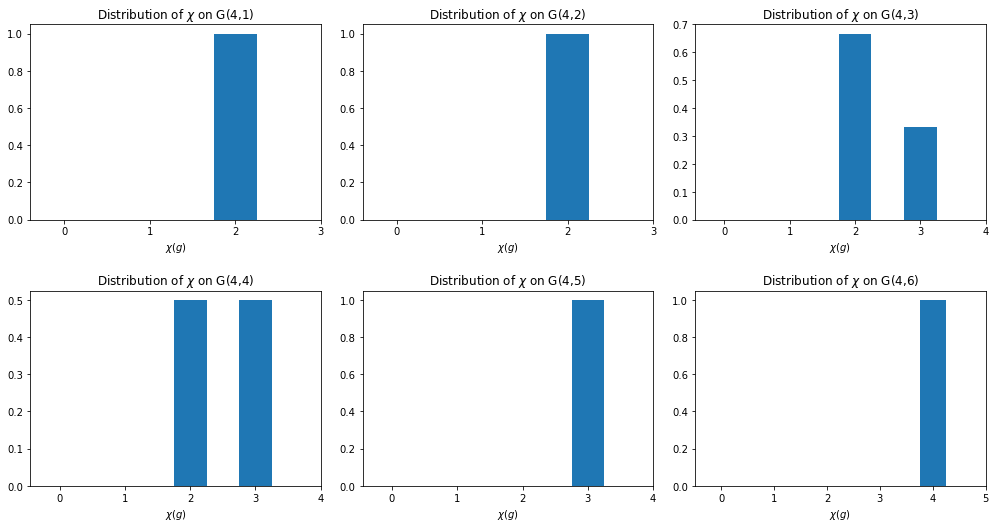

In [5]:
fig, axs = plt.subplots(2,3,figsize=(14,7))
fig.tight_layout(h_pad=5)

#fix n and get set of apropriate ms
n = 4

m_max = (n*(n-1))/2
ms = range(1,m_max+1)

Dic = {}
for m in ms:
    #make the generater and get Chis
    gen = graphs(n, size=m)
    data = [g.chromatic_number() for g in gen]
    #assign to dic
    Dic[m] = data

#loop over the subplots
for i,ax in enumerate(axs.flatten()):
    #shift the index to use with key
    i_n = i+1
    
    #get the Chi data
    Chi = Dic[i_n]
    bins = np.arange(0, max(Chi) + 1.25) - 0.25
    ax.hist(Chi, bins,width=0.5,density=True)
    ax.set_xticks(bins + 0.25)
    ax.set_title(fr'Distribution of $\chi$ on G({n},{ms[i]})')
    ax.set_xlabel(fr'$\chi(g)$')
    

plt.show()